In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv("C:/Users/cathe/Documents/DS/Reference File/Predicting Prices using Regression/train.csv")

In [5]:
test = pd.read_csv("C:/Users/cathe/Documents/DS/Reference File/Predicting Prices using Regression/test.csv")

In [6]:
train.shape

(1460, 81)

In [7]:
test.shape

(1459, 80)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
df = pd.concat([train,test])

In [11]:
df.shape

(2919, 81)

In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [13]:
pd.set_option('display.max_rows',3000)
pd.set_option('display.max_columns',100)

In [14]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [16]:
df.select_dtypes(include=['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
df = df.set_index('Id')

In [19]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [20]:
abc = df.isnull().sum()/df.shape[0] * 100

In [21]:
abc

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

In [22]:
columns_drop = abc[abc >20].keys()

In [23]:
columns_drop

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature',
       'SalePrice'],
      dtype='object')

In [24]:
df = df.drop(columns_drop, axis =1)

In [25]:
df.shape

(2919, 73)

In [26]:
columns = list(df.columns.values)
for i in columns:
    print(i.ljust(25) + "\t" + str(len(df[i].unique())))

MSSubClass               	16
MSZoning                 	6
LotFrontage              	129
LotArea                  	1951
Street                   	2
LotShape                 	4
LandContour              	4
Utilities                	3
LotConfig                	5
LandSlope                	3
Neighborhood             	25
Condition1               	9
Condition2               	8
BldgType                 	5
HouseStyle               	8
OverallQual              	10
OverallCond              	9
YearBuilt                	118
YearRemodAdd             	61
RoofStyle                	6
RoofMatl                 	8
Exterior1st              	16
Exterior2nd              	17
MasVnrArea               	445
ExterQual                	4
ExterCond                	5
Foundation               	6
BsmtQual                 	5
BsmtCond                 	5
BsmtExposure             	5
BsmtFinType1             	7
BsmtFinSF1               	992
BsmtFinType2             	7
BsmtFinSF2               	273
BsmtUnfSF                	113

In [27]:
col_headers = list(df.columns.values)
for i in col_headers:
    print (i)
    print(df[i].unique())
    print ('\n')

MSSubClass
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40 150]


MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH' nan]


LotFrontage
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.  26.
  25. 119.  31.  28. 117. 113. 125. 135. 136.  22. 123. 195. 155. 126.
 200. 131. 133.]


LotArea
[ 8450  9600 11250 ...  1894 20000 10441]


Street
['Pave' 'Grvl']


LotShape
['Reg' 'IR1' 'IR2' 'IR3']


LandContour
['Lvl' 'Bnk' 'Low' 'HLS']


Utilities
['AllPub' 'NoSeWa' nan]


LotConfig
['In

# Outlier Detection

In [28]:
# Outliers can be filtered manually by plotting boxplots and identifying and removing those rows from the data
# Or you can decide on a statistical figure such as removing all rows which are outside 3 standard deviations from the mean value 
# For this usecase we wouldnt use an outlier detection technique becuase we can have outliers in test data as well so it might mess up with accuracy
# However, we will make our data robust to outliers by transforming them in that manner

# EDA

In [29]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [30]:
# Skewness checking

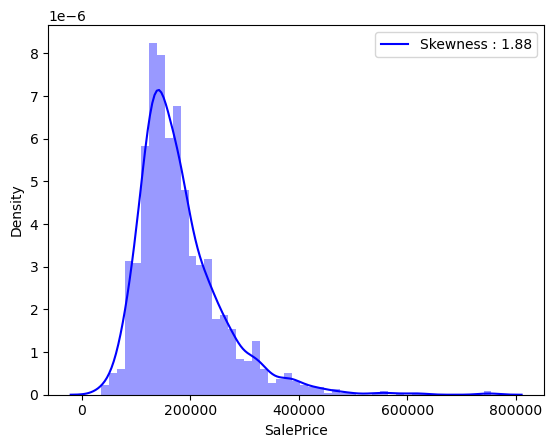

In [31]:
g = sns.distplot(train['SalePrice'],color="blue")
g = g.legend(['Skewness : {:.2f}'.format(train['SalePrice'].skew())],loc='best')

In [32]:
# Need to transform this data to reduce skewness
# Need to do correlation

In [33]:
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns
numeric_data = train[numeric_columns]

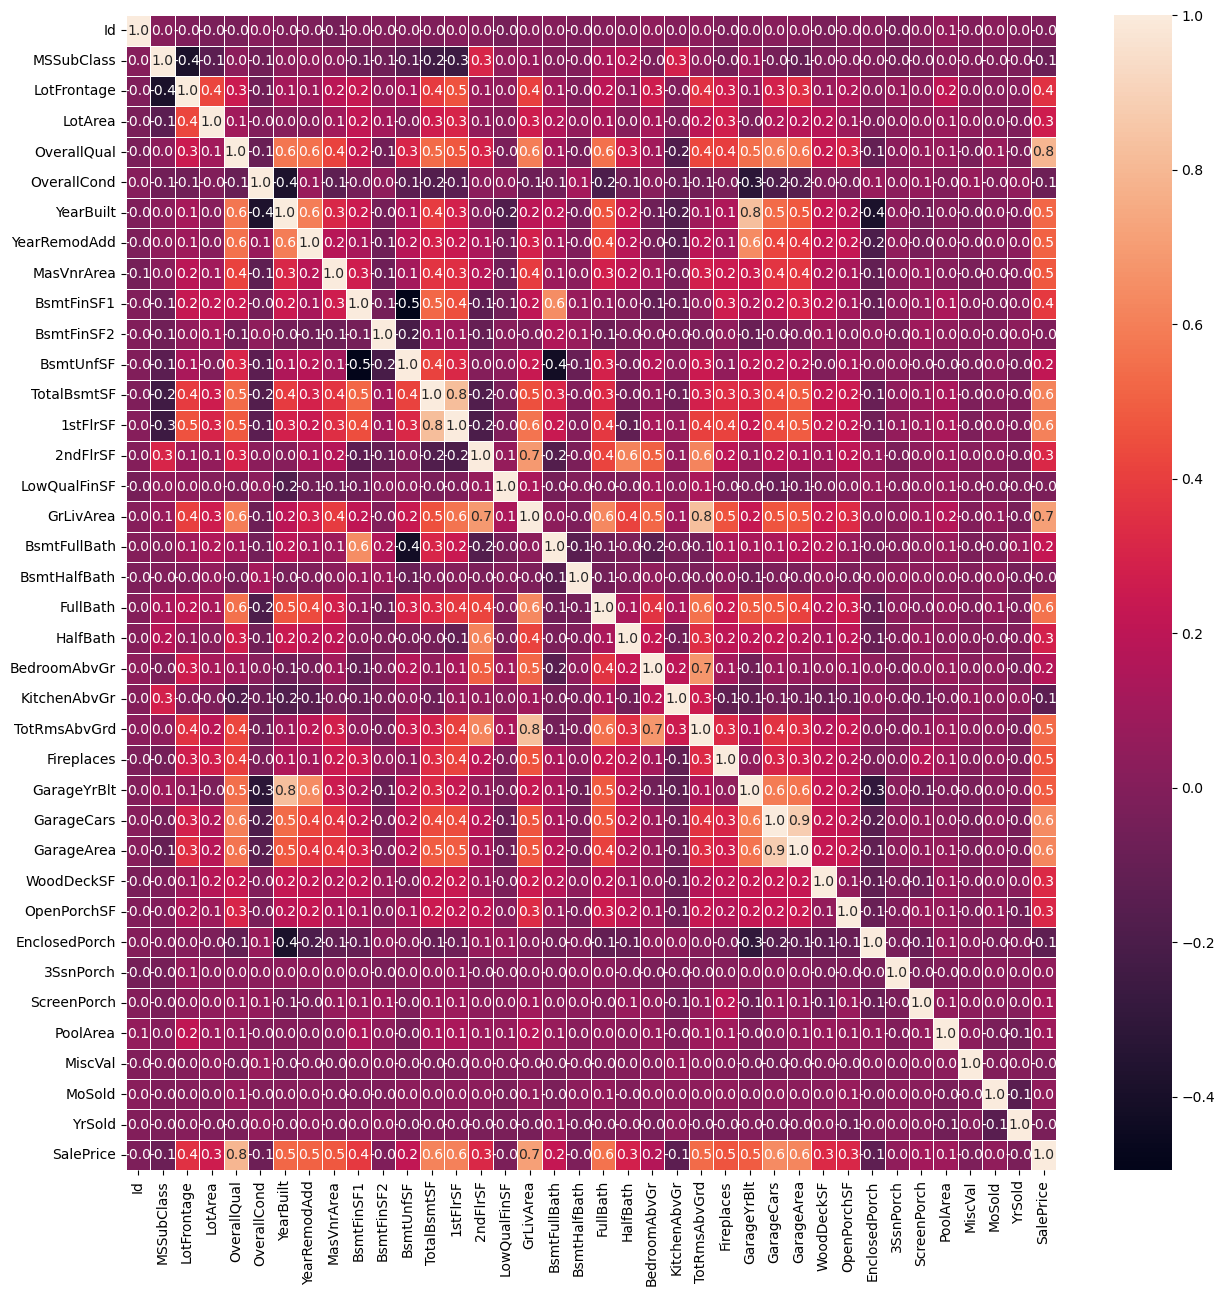

In [34]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(numeric_data.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

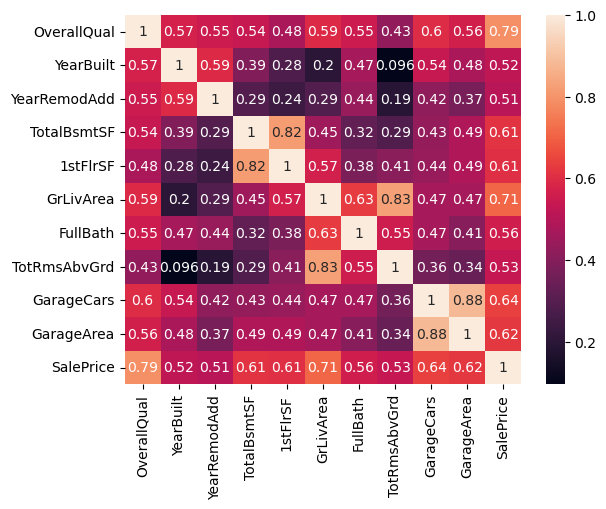

In [35]:
# most correlated features
corre = numeric_data.corr()
top_corr_features = corre.index[abs(corre["SalePrice"])>0.5]
g = sns.heatmap(train[top_corr_features].corr(),annot=True)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

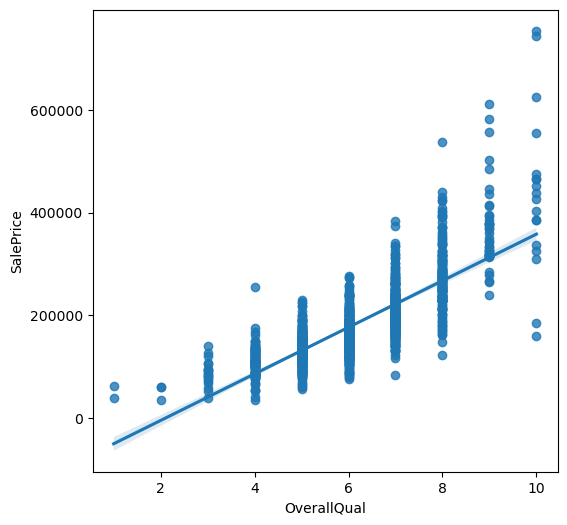

In [36]:
f,ax = plt.subplots(figsize=(6, 6))
sns.regplot(data = train, x =  "OverallQual", y = "SalePrice" )

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

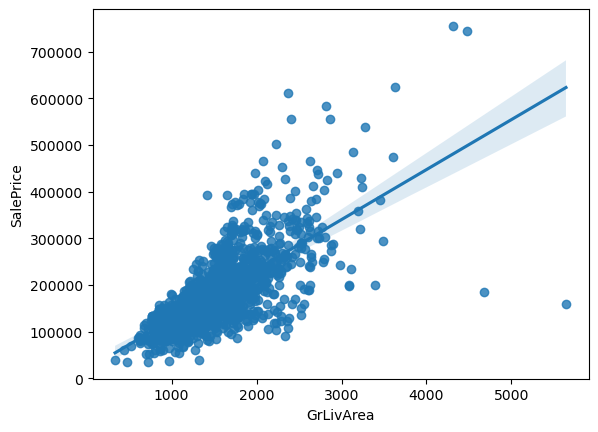

In [37]:
sns.regplot(data = train, x =  "GrLivArea", y = "SalePrice" )

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

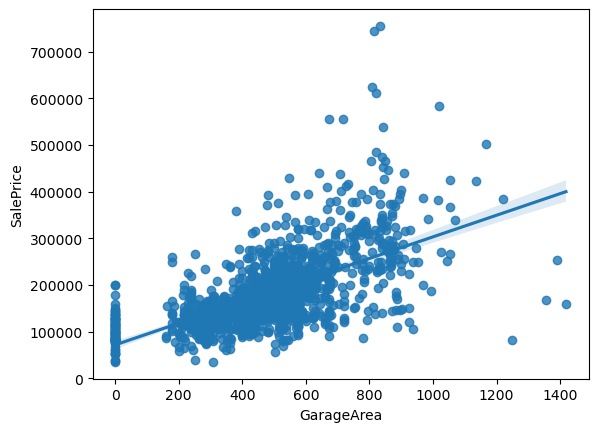

In [38]:
sns.regplot(data = train, x =  "GarageArea", y = "SalePrice" )

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

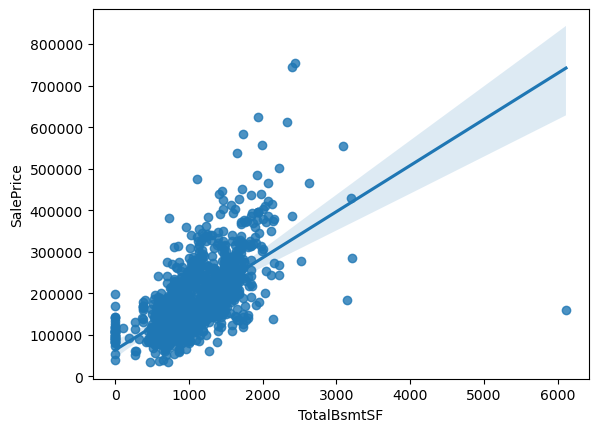

In [39]:
sns.regplot(data = train, x =  "TotalBsmtSF", y = "SalePrice" )

In [40]:
# Missing Value Imputation

In [41]:
missing_cols = df.columns[df.isnull().any()]

In [42]:
missing_cols

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

In [43]:
bsmt_cols = ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF','TotalBsmtSF']

In [44]:
bsmt_feat = df[bsmt_cols]

In [45]:
bsmt_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BsmtCond      2837 non-null   object 
 1   BsmtExposure  2837 non-null   object 
 2   BsmtFinSF1    2918 non-null   float64
 3   BsmtFinSF2    2918 non-null   float64
 4   BsmtFinType1  2840 non-null   object 
 5   BsmtFinType2  2839 non-null   object 
 6   BsmtFullBath  2917 non-null   float64
 7   BsmtHalfBath  2917 non-null   float64
 8   BsmtQual      2838 non-null   object 
 9   BsmtUnfSF     2918 non-null   float64
 10  TotalBsmtSF   2918 non-null   float64
dtypes: float64(6), object(5)
memory usage: 273.7+ KB


In [46]:
bsmt_feat = bsmt_feat[bsmt_feat.isnull().any(axis=1)]

In [47]:
bsmt_feat.shape

(88, 11)

In [48]:
bsmt_feat

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,,,
18,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
40,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
91,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
103,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
157,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
183,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
260,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
333,TA,No,1124.0,479.0,GLQ,NaN,1.0,0.0,Gd,1603.0,3206.0
343,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0


In [49]:
bsmt_feat_all_nan = bsmt_feat[(bsmt_feat.isnull()|bsmt_feat.isin([0])).all(1)]

In [50]:
bsmt_feat_all_nan.shape

(79, 11)

In [51]:
bsmt_feat_all_nan

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,,,
18,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
40,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
91,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
103,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
157,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
183,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
260,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
343,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0
363,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0


In [52]:
qual = list(df.loc[:,df.dtypes == "object"].columns.values)

In [53]:
qual

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [54]:
for i in bsmt_cols:
    if i in qual:
        bsmt_feat_all_nan[i] = bsmt_feat_all_nan[i].replace(np.nan,'NA')
    else:
        bsmt_feat_all_nan[i] = bsmt_feat_all_nan[i].replace(np.nan,0)
bsmt_feat.update(bsmt_feat_all_nan)

In [55]:
df.update(bsmt_feat_all_nan)

In [56]:
bsmt_feat = bsmt_feat[bsmt_feat.isin([np.nan]).any(axis=1)]

In [57]:
bsmt_feat.shape

(9, 11)

In [58]:
bsmt_feat

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,,,
333,TA,No,1124.0,479.0,GLQ,NaN,1.0,0.0,Gd,1603.0,3206.0
949,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,936.0,936.0
1488,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,1595.0,1595.0
2041,NaN,Mn,1044.0,382.0,GLQ,Rec,1.0,0.0,Gd,0.0,1426.0
2186,NaN,No,1033.0,0.0,BLQ,Unf,0.0,1.0,TA,94.0,1127.0
2218,Fa,No,0.0,0.0,Unf,Unf,0.0,0.0,NaN,173.0,173.0
2219,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,NaN,356.0,356.0
2349,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,725.0,725.0
2525,NaN,Av,755.0,0.0,ALQ,Unf,0.0,0.0,TA,240.0,995.0


In [59]:
print(df['BsmtFinSF2'].max())
print(df['BsmtFinSF2'].min())

1526.0
0.0


In [60]:
pd.cut(range(0,1526),5)

[(-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], (-1.525, 305.0], ..., (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0], (1220.0, 1525.0]]
Length: 1526
Categories (5, interval[float64, right]): [(-1.525, 305.0] < (305.0, 610.0] < (610.0, 915.0] < (915.0, 1220.0] < (1220.0, 1525.0]]

In [61]:
df_slice = df[(df['BsmtFinSF2'] >= 305) & (df['BsmtFinSF2'] <= 610)]

In [62]:
bsmt_feat.at[333,'BsmtFinType2'] = df_slice['BsmtFinType2'].mode()[0]

In [63]:
bsmt_feat['BsmtExposure'] = bsmt_feat['BsmtExposure'].replace(np.nan, df[df['BsmtQual'] == 'Gd']['BsmtExposure'].mode()[0])

In [64]:
bsmt_feat['BsmtCond'] = bsmt_feat['BsmtCond'].replace(np.nan,df['BsmtCond'].mode()[0])

In [65]:
bsmt_feat['BsmtQual'] = bsmt_feat['BsmtQual'].replace(np.nan,df['BsmtQual'].mode()[0])

In [66]:
df.update(bsmt_feat)

In [67]:
df.columns[df.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'SaleType'],
      dtype='object')

In [68]:
garage_cols = ['GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt']

In [69]:
gar_feat = df[garage_cols]

In [70]:
gar_feat = gar_feat[gar_feat.isnull().any(axis=1)]

In [71]:
gar_feat.shape

(159, 7)

In [72]:
gar_feat_all_nan = gar_feat[(gar_feat.isnull()|gar_feat.isin([0])).all(1)]

In [73]:
gar_feat_all_nan.shape

(157, 7)

In [74]:
for i in garage_cols:
    if i in qual:
        gar_feat_all_nan[i] = gar_feat_all_nan[i].replace(np.nan,'NA')
    else:
        gar_feat_all_nan[i] = gar_feat_all_nan[i].replace(np.nan,0)
gar_feat.update(gar_feat_all_nan)

In [75]:
df.update(gar_feat_all_nan)

In [76]:
gar_feat = gar_feat[gar_feat.isnull().any(axis=1)]

In [77]:
gar_feat

,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt
Id,,,,,,,
2127,360.0,1.0,NaN,NaN,NaN,Detchd,NaN
2577,NaN,NaN,NaN,NaN,NaN,Detchd,NaN


In [78]:
for i in garage_cols:
    gar_feat[i] = gar_feat[i].replace(np.nan,df[df['GarageType'] == 'Detchd'][i].mode()[0])

In [79]:
df.update(gar_feat)

In [80]:
df.columns[df.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'Electrical', 'KitchenQual', 'Functional', 'SaleType'],
      dtype='object')

In [81]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [82]:
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])

In [83]:
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

In [84]:
df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])

In [85]:
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

In [86]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [87]:
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

In [88]:
df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])

In [89]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'MasVnrArea'], dtype='object')

In [90]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

In [91]:
df.loc[(df["MasVnrArea"] == "None") & (df['MasVnrArea'].isnull()==True),"MasVnrArea"] = 0

In [92]:
df.isnull().sum()/df.shape[0] * 100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrArea        0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
Heating           0.000000
H

In [93]:
lotconfig = ['Corner','Inside','CulDSac','FR2','FR3']
for i in lotconfig:
    condition = (df['LotFrontage'].isnull()) & (df['LotConfig'] == i)
    mean_value = df.loc[df['LotConfig'] == i, 'LotFrontage'].mean()
    df['LotFrontage'] = np.where(condition, mean_value, df['LotFrontage'])

In [94]:
df.isnull().sum()/df.shape[0] * 100

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath     

In [95]:
# Feature Transformation

In [96]:
convert_columns = ['MSSubClass','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
for i in convert_columns:
    df[i]=df[i].astype(str)

In [97]:
import calendar
df['MoSold'] = df['MoSold'].apply(lambda x: calendar.month_abbr[x])

In [98]:
df['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [99]:
quan = list( df.loc[:,df.dtypes != 'object'].columns.values )

In [100]:
len(quan)

30

In [101]:
quan

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [102]:
# Ordered data 

In [103]:
# Categorical Values 
# Ordered
df['BsmtCond'] = pd.Categorical(df['BsmtCond'], categories=['NA','Po','Fa','TA','Gd','Ex'], ordered=True).codes


In [104]:
df['BsmtExposure'] = pd.Categorical(df['BsmtExposure'], categories=['NA','Mn','Av','Gd'], ordered=True).codes

In [105]:
df['BsmtFinType1'] = pd.Categorical(df['BsmtFinType1'], categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'], ordered=True).codes

In [106]:
df['BsmtFinType2'] = pd.Categorical(df['BsmtFinType2'], categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'], ordered=True).codes

In [107]:
df['BsmtQual'] = pd.Categorical(df['BsmtQual'], categories=['NA','Po','Fa','TA','Gd','Ex'], ordered=True).codes

In [108]:
df['ExterCond'] = pd.Categorical(df['ExterCond'], categories=['Po','Fa','TA','Gd','Ex'], ordered=True).codes

In [109]:
df["ExterQual"] = pd.Categorical(df["ExterQual"], categories=['Po','Fa','TA','Gd','Ex'], ordered=True).codes
df["Functional"] = pd.Categorical(df["Functional"],categories=['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'], ordered=True).codes
df["GarageCond"] = pd.Categorical(df["GarageCond"],categories=['NA','Po','Fa','TA','Gd','Ex'], ordered=True).codes
df["GarageFinish"] = pd.Categorical(df["GarageFinish"],categories=['NA','Unf','RFn','Fin'], ordered=True).codes
df["GarageQual"] = pd.Categorical(df["GarageQual"],categories=['NA','Po','Fa','TA','Gd','Ex'], ordered=True).codes
df["HeatingQC"] = pd.Categorical(df["HeatingQC"],categories=['Po','Fa','TA','Gd','Ex'], ordered=True).codes
df["KitchenQual"] = pd.Categorical(df["KitchenQual"],categories=['Po','Fa','TA','Gd','Ex'], ordered=True).codes
df["PavedDrive"] = pd.Categorical(df["PavedDrive"],categories=['N','P','Y'], ordered=True).codes
df["Utilities"] = pd.Categorical(df["Utilities"],categories=['ELO','NASeWa','NASewr','AllPub'], ordered=True).codes


In [110]:
skewed_features = ['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

1stFlrSF


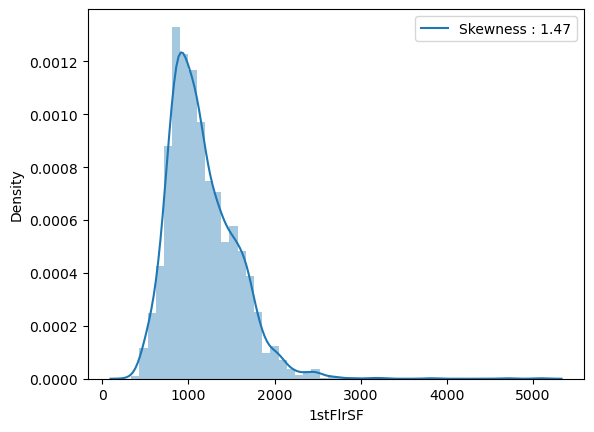

2ndFlrSF


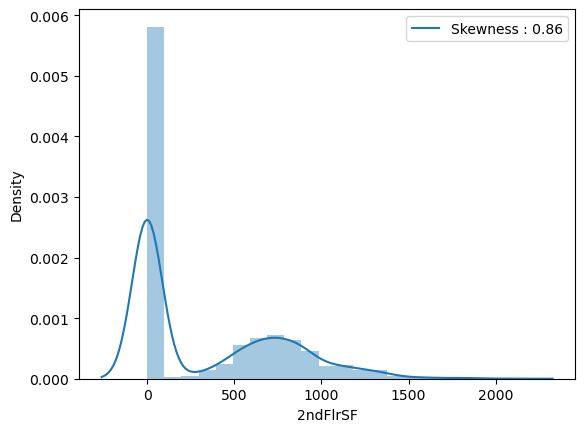

3SsnPorch


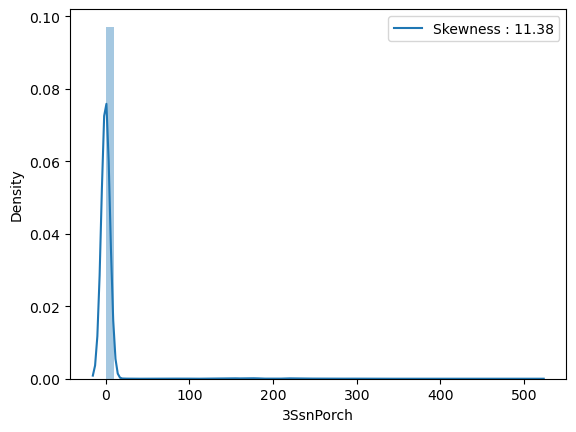

BedroomAbvGr


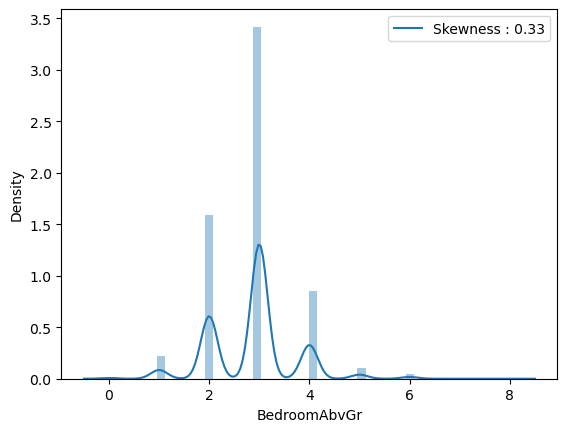

BsmtFinSF1


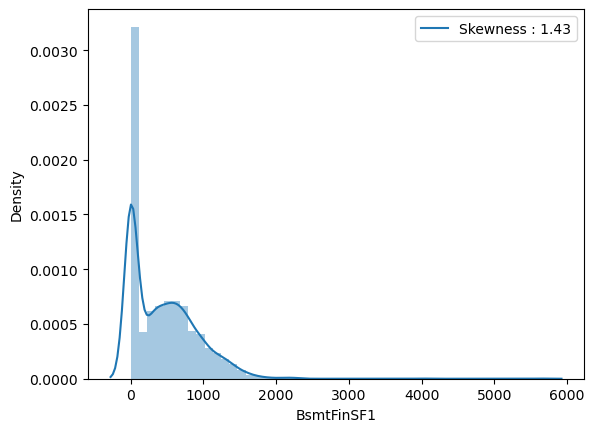

BsmtFinSF2


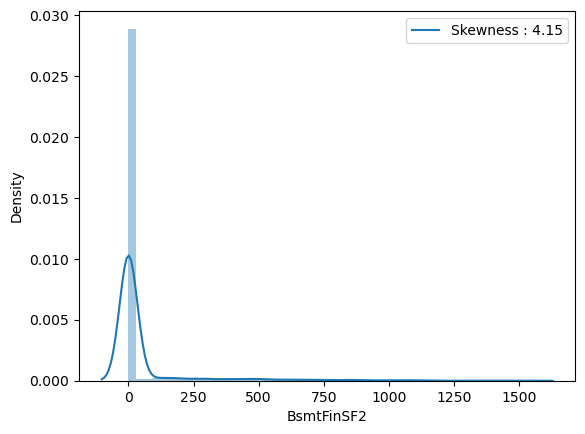

BsmtFullBath


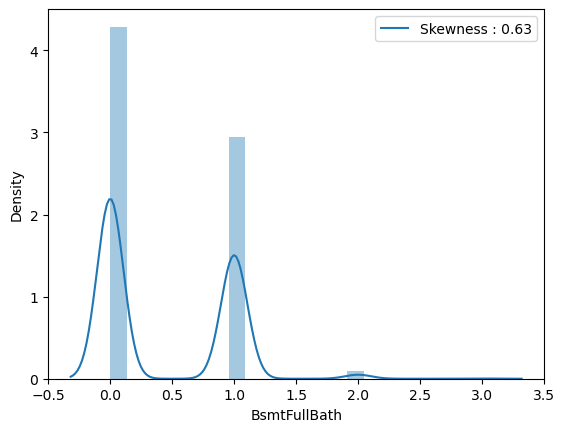

BsmtHalfBath


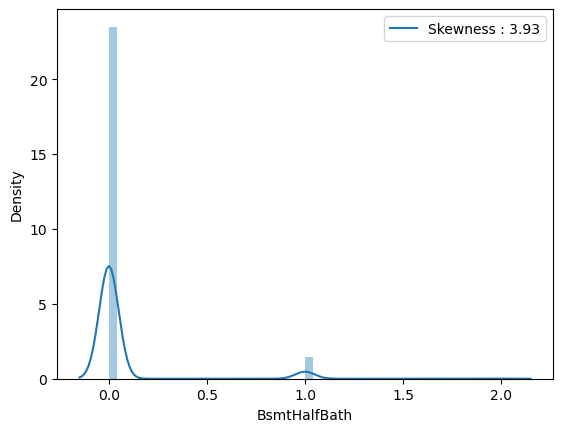

BsmtUnfSF


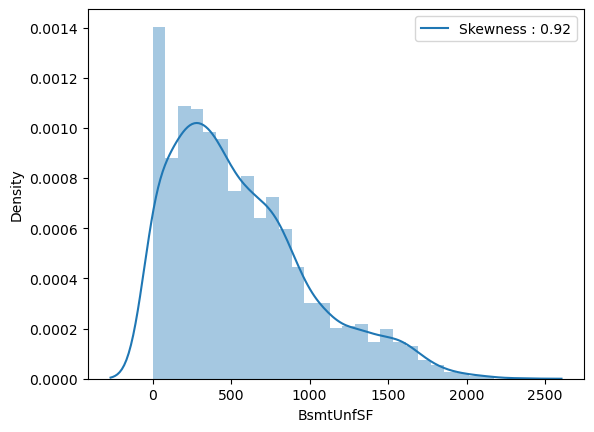

EnclosedPorch


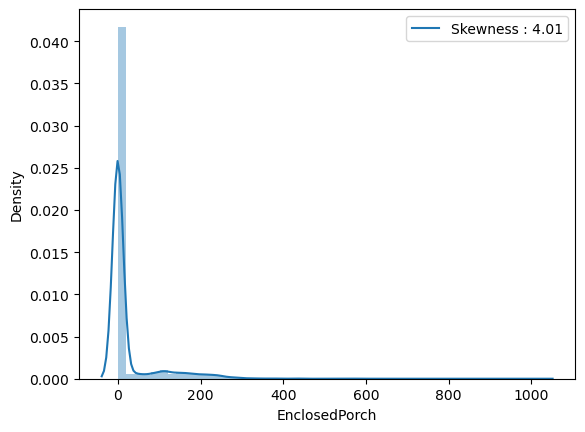

Fireplaces


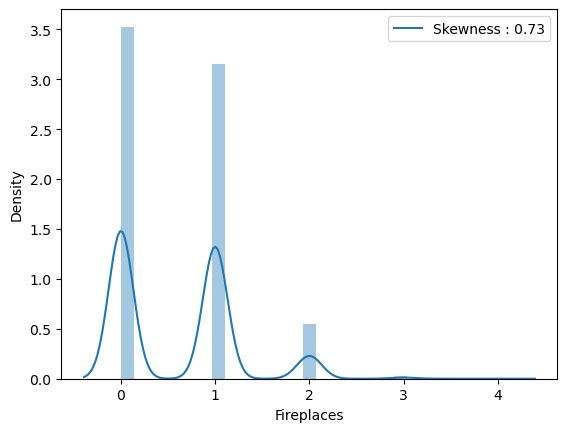

FullBath


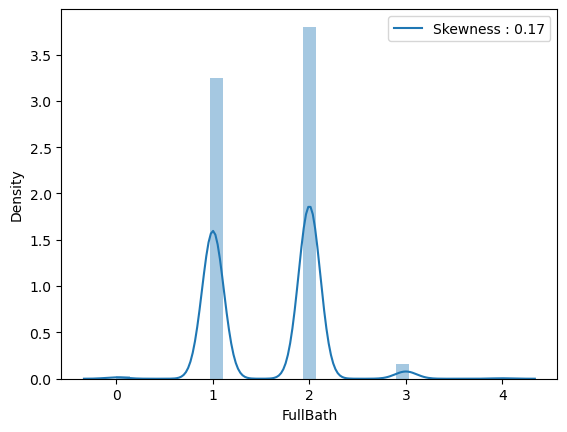

GarageArea


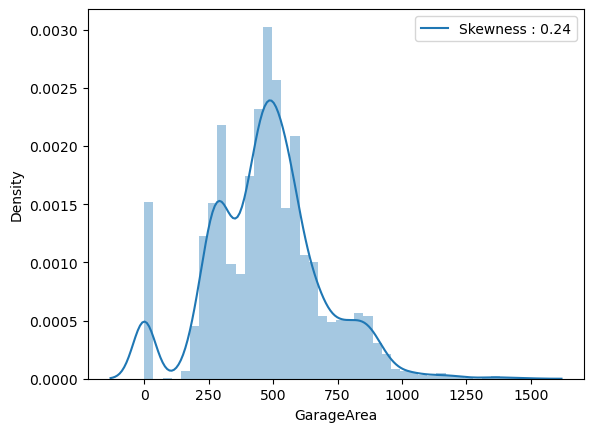

GarageCars


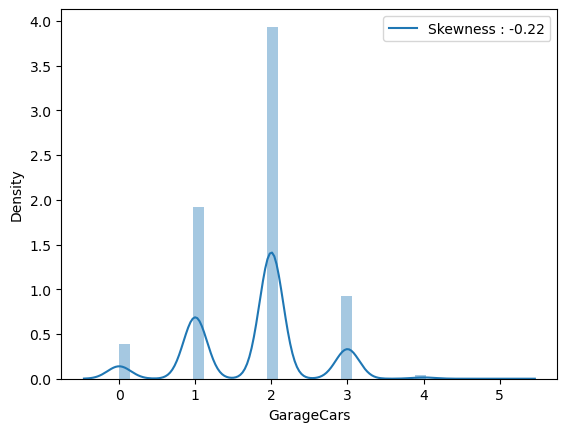

GrLivArea


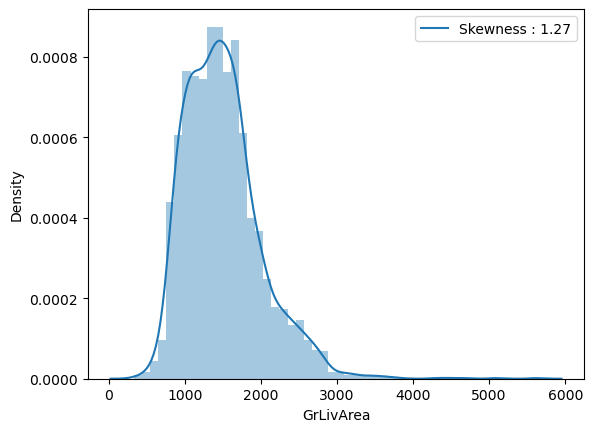

HalfBath


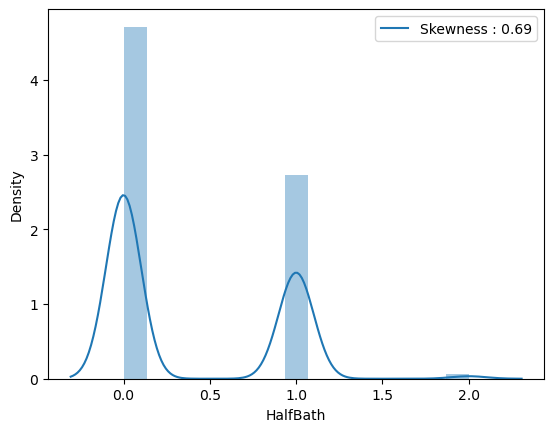

KitchenAbvGr


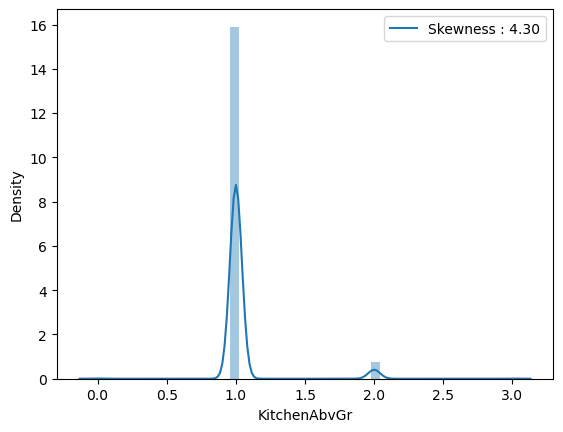

LotArea


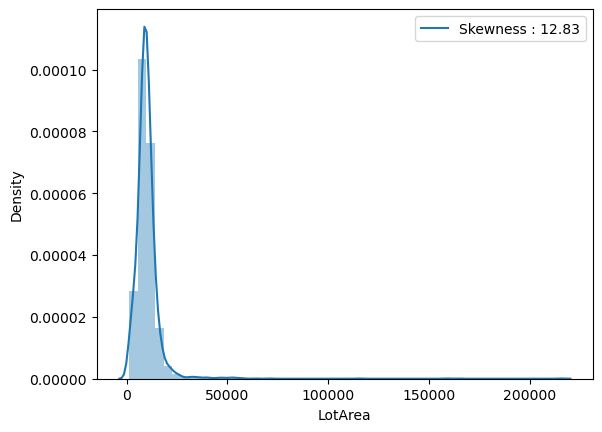

LotFrontage


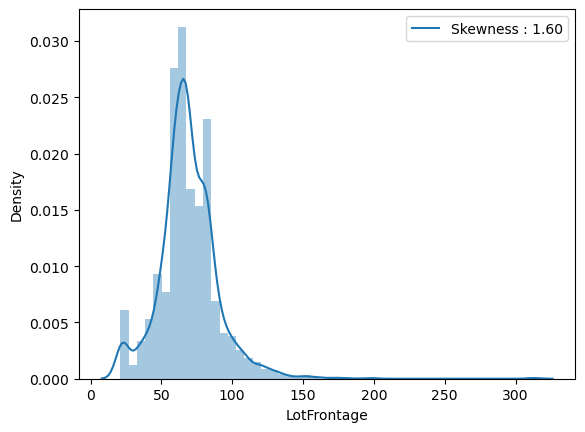

LowQualFinSF


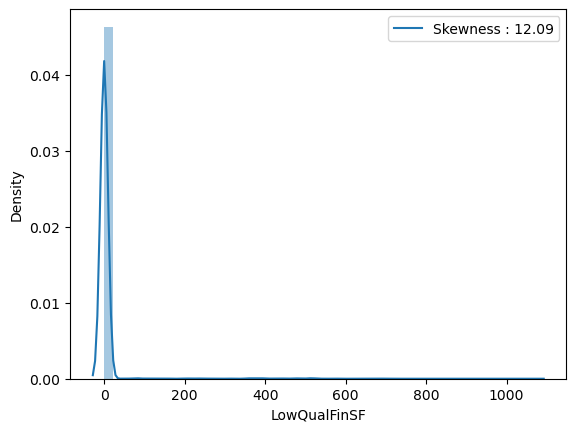

MasVnrArea


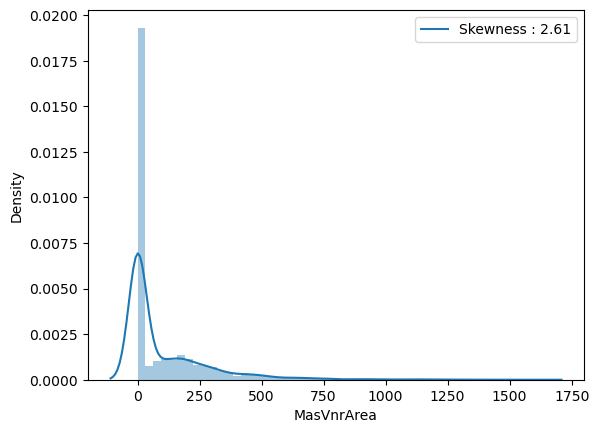

MiscVal


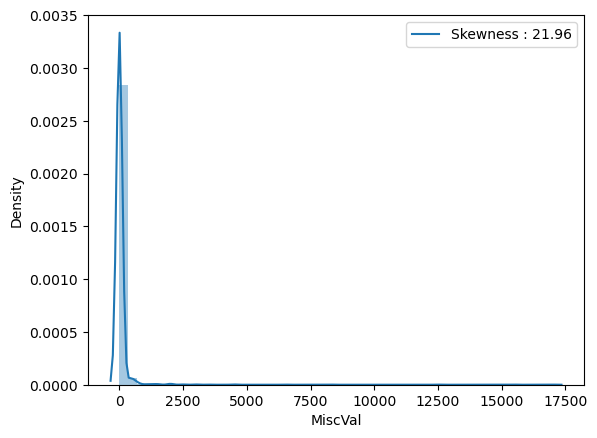

OpenPorchSF


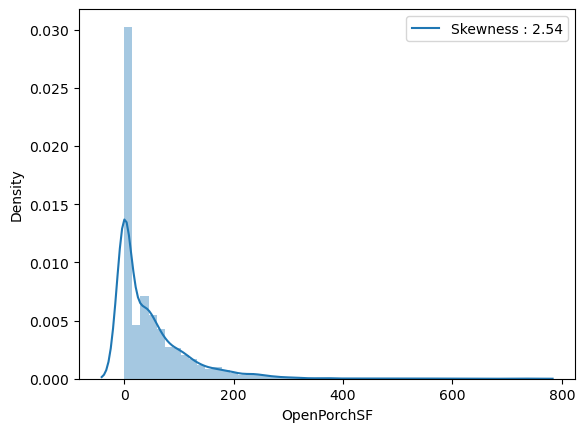

PoolArea


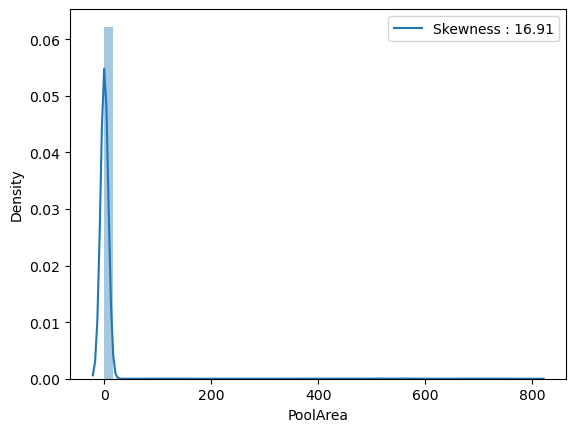

ScreenPorch


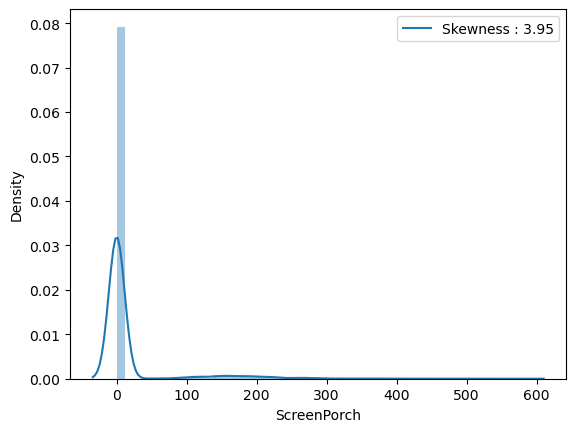

TotRmsAbvGrd


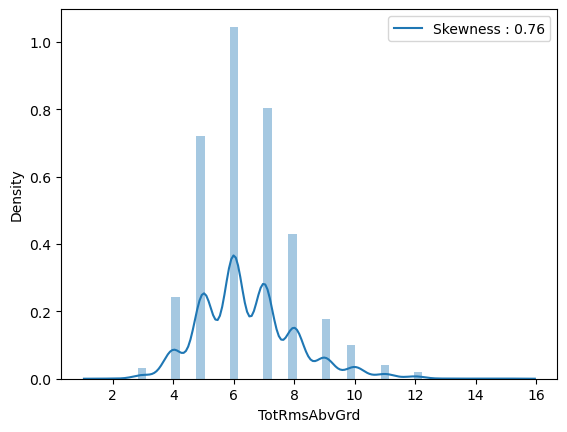

TotalBsmtSF


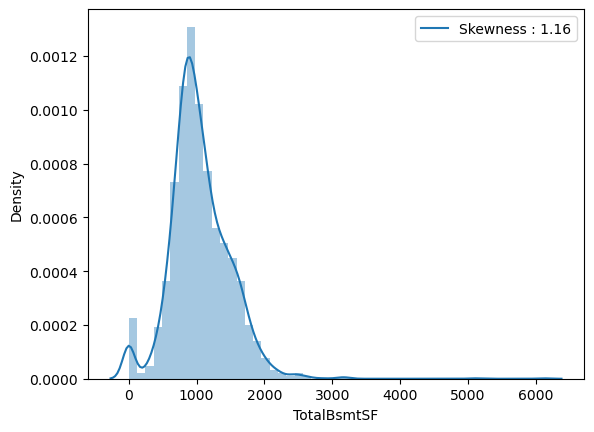

WoodDeckSF


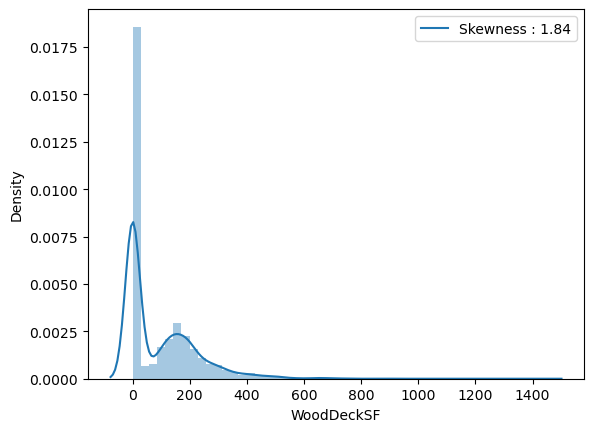

In [111]:
for i in skewed_features:
    print (i)
    g = sns.distplot(df[i])
    g = g.legend(['Skewness : {:.2f}'.format(df[i].skew())],loc='best')
    plt.show()

In [112]:
# Remove skewness in the data
for i in skewed_features:
    df[i]= np.log(df[i] + 1)

In [113]:
SalePrice = np.log(train['SalePrice'] + 1)

In [114]:
# Create dummies for all non ordinal categorical data

In [115]:
qual = list( df.loc[:,df.dtypes == 'object'].columns.values )

In [116]:
len(qual)

28

In [117]:
dummy_drop = []
for i in qual:
    dummy_drop += [ i+'_'+str(df[i].unique()[-1]) ]

# create dummy variables
df = pd.get_dummies(df,columns=qual) 
# drop the last column generated from each categorical feature
df = df.drop(dummy_drop,axis=1)

In [118]:
df.shape

(2919, 497)

In [119]:
from sklearn.preprocessing import RobustScaler

In [120]:
# Normalize data 
scaler = RobustScaler()
scaler.fit(df)
df_scaled = scaler.fit_transform(df)

In [121]:
# Modelling
# Split data to train and test

In [122]:
train_len  = len(train)

In [123]:
X_train = df_scaled[:train_len]

In [124]:
Y_train = SalePrice

In [125]:
X_test = df_scaled[train_len:]

In [126]:
X_train.shape

(1460, 497)

In [127]:
X_test.shape

(1459, 497)

In [128]:
X_test_df = pd.DataFrame(data=X_test, columns=df.columns)

In [129]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score
import sklearn.linear_model as linear_model
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor

In [130]:
def test_model(model):
    cv = KFold(n_splits=3, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, Y_train, cv=cv, scoring=r2)
    scores = [r2_val_score.mean()]
    return scores

In [131]:
LR = linear_model.LinearRegression()

In [132]:
Rid = linear_model.Ridge()

In [133]:
lasso = linear_model.Lasso(alpha=1e-4)

In [134]:
GB = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss='squared_error', random_state=10)

In [135]:
test_model(LR)

[-5.04499225163838e+22]

In [136]:
test_model(Rid)

[0.864801001893721]

In [137]:
test_model(lasso)

[0.8679186126665249]

In [138]:
test_model(GB)

[0.8815341421769105]

In [139]:
BR = BaggingRegressor(base_estimator=None, n_estimators=1000,  random_state = 10)

In [140]:
test_model(BR)

[0.8566954161073266]

In [142]:
GB.fit(X_train, Y_train)

GradientBoostingRegressor(n_estimators=1000, random_state=10)

In [143]:
Y_predict = np.expm1(GB.predict(X_test)).round(2)

In [145]:
Y_predict[0:5]

array([114767.23, 165496.26, 187906.67, 196398.72, 192037.19])